# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np

# Load the data into a DataFrame
# This is the 10% version, which is actually 10% of the reduced version
df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')
df.head()




,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [2]:
## Transform the dates if needed, e.g.
from datetime import datetime
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
#removing the spaces between words in the column names and replacing it with "-"
df.columns = [x.replace(' ','_') for x in df.columns]  
df.columns

Index([u'Date', u'Store_Number', u'City', u'Zip_Code', u'County_Number',
       u'County', u'Category', u'Category_Name', u'Vendor_Number',
       u'Item_Number', u'Item_Description', u'Bottle_Volume_(ml)',
       u'State_Bottle_Cost', u'State_Bottle_Retail', u'Bottles_Sold',
       u'Sale_(Dollars)', u'Volume_Sold_(Liters)', u'Volume_Sold_(Gallons)'],
      dtype='object')

In [4]:
#get rid of the '$' sign in the string and convert to float

df['Sale_(Dollars)'] = df['Sale_(Dollars)'].map(lambda x: x.lstrip('$')).astype(float)
df['State_Bottle_Cost'] = df['State_Bottle_Cost'].map(lambda x: x.lstrip('$')).astype(float)
df['State_Bottle_Retail'] = df['State_Bottle_Retail'].map(lambda x: x.lstrip('$')).astype(float)
df.head()

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#adding year, month columns.  also adding indicators for being in 1Q15 and 1Q16

df['year'] = [df['Date'][i].year for i in range(len(df))]
df['month'] = [df['Date'][i].month for i in range(len(df))]
df['quarter'] = [int((df['Date'][i].month-1)/3)+1 for i in range(len(df))]
df['2015'] = (df['year'] == 2015)*1
df['in1Q15'] =  ((df['2015'])&(df['quarter'] == 1))*1
df['in1Q16'] =  ((df['year'] == 2016)&(df['quarter'] == 1))*1

#sum of 'sales_check below is zero, showing that the dependent variable 'Sale_(Dollars)' is just 
#the product of two independent variables in the data
df['sales_check'] = (df['Sale_(Dollars)'] - df['Bottles_Sold']*df['State_Bottle_Retail'])


df.head(20)
df.sales_check.sum()


-2.559907841259701e-11

In [7]:
df['nSold_x_Price'] = df['Bottles_Sold']*df['State_Bottle_Retail']
df['1Q15_nSold_x_Price'] = df['nSold_x_Price'] * df['in1Q15']
df['2015_sales'] = df['Sale_(Dollars)'] * df['2015']
df['1Q16_nSold_x_Price'] = df['nSold_x_Price'] * df['in1Q16']


In [8]:
table = pd.pivot_table(df, values='Sale_(Dollars)', index =['County','County_Number'], columns=['year'], aggfunc=np.sum, \
                       margins=True)
table = table.sort_values(by=2015, ascending = False)
table.head()


,year,2015,2016,All
County,County_Number,,,
All,,2.851804e+07,6291870.90,3.480991e+07
Polk,77.0,6.402211e+06,1383147.02,7.785358e+06
Linn,57.0,2.606327e+06,544102.21,3.150429e+06
Scott,82.0,2.044169e+06,424554.73,2.468723e+06
Johnson,52.0,1.719917e+06,371388.76,2.091306e+06


In [9]:
# This provides the derived independent variable X ('1Q15_nSold_x_Price') and the target variable Y ('2015_sales') 
# by store number
# The model using 2015 data is applied to '1Q16_nSold_x_Price' to generate predicted values for 2016 sales by store

tb = pd.pivot_table(df, values=['2015_sales','1Q15_nSold_x_Price','1Q16_nSold_x_Price'], index =['Store_Number'],\
                       aggfunc=np.sum)

tb.head(20)

,1Q15_nSold_x_Price,1Q16_nSold_x_Price,2015_sales
Store_Number,,,
2106,39287.29,30523.75,146326.22
2113,2833.25,2065.90,9310.22
2130,24272.57,27856.11,111871.43
2152,2003.46,1376.43,7721.08
2178,5856.41,5588.50,24324.18
2190,29452.92,34515.69,121689.06
2191,29085.57,47338.20,125093.49
2200,4900.43,4174.87,22811.55
2205,6407.74,0.00,24681.39


In [10]:
# 2015 sales is more than 4 times the 1Q15 sales, meaning that sales are slow in 1Q15.
# The predicted values by regression should be close to the following ratio 
#    multiplied by the 2016 Q1 sales by store
tb['2015_sales'].sum()/tb['1Q15_nSold_x_Price'].sum()

4.635715239817618

In [11]:
tb.describe()

,1Q15_nSold_x_Price,1Q16_nSold_x_Price,2015_sales
count,1400.000000,1400.000000,1.400000e+03
mean,4395.568493,4571.069686,2.037660e+04
std,11090.244243,11423.353020,5.051300e+04
min,0.000000,0.000000,0.000000e+00
25%,623.845000,737.077500,3.022570e+03
50%,1545.990000,1646.390000,6.934580e+03
75%,4127.700000,4116.270000,1.875262e+04
max,207012.080000,219551.790000,1.000783e+06


## Record your findings

Be sure to write out anything observations from your exploratory analysis.
- sum of 'sales_check' above is zero, showing that the dependent variable 'Sale_(Dollars)' is just the product of two independent variables in the data
- the ratio of 2015 total sales and 1Q15 sales is higher than 4, indicating that the first quarter has less sales than other quarters on average 
- the predicted values by regression should be close to the ratio above multiplied by the 2016 Q1 sales by store


# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

Data is refined above

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# create X and y
X = tb[['1Q15_nSold_x_Price']]
y = tb['2015_sales']

# instantiate, fit

lm = LinearRegression()
lm.fit(X, y)

# print coefficients
lm.coef_ , lm.intercept_


(array([ 4.45511262]), 793.85119694675086)

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

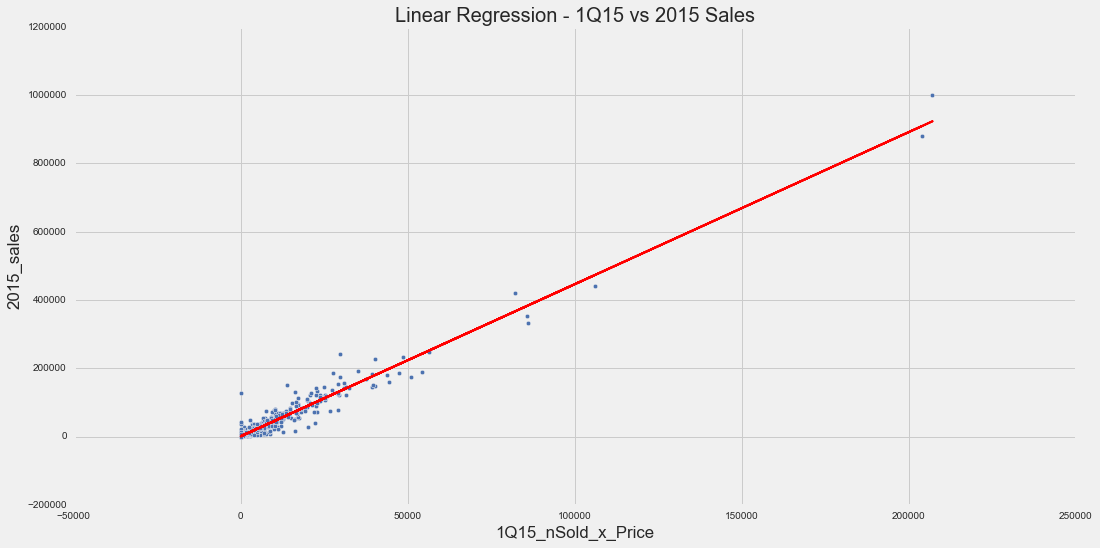

In [44]:
preds = lm.predict(X)

# scatter plot of 1Q15 vs 2015 Sales
tb.plot(kind='scatter', x='1Q15_nSold_x_Price', y='2015_sales',figsize=(16, 8))
# plot the least squares line
plt.plot(X, preds, c='red', linewidth=2)
plt.title("Linear Regression - 1Q15 vs 2015 Sales",fontsize=20)
plt.show()

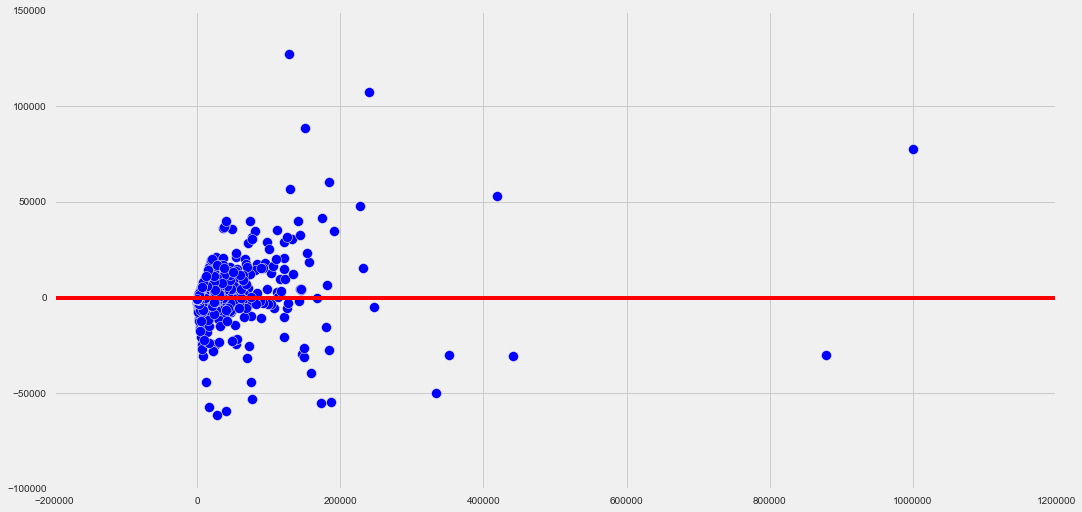

In [36]:
# Look directly at the residuals.  It looks centered at zero.
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(16,8))
axes = fig.gca()
plt.scatter(y, y - preds, c = 'b', s=100, marker = 'o') 
plt.axhline(0, color='r')

In [15]:
lm.score(X,y)

0.9567386201525705

In [16]:
X_new = tb[['1Q16_nSold_x_Price']]
preds_new = lm.predict(X_new)


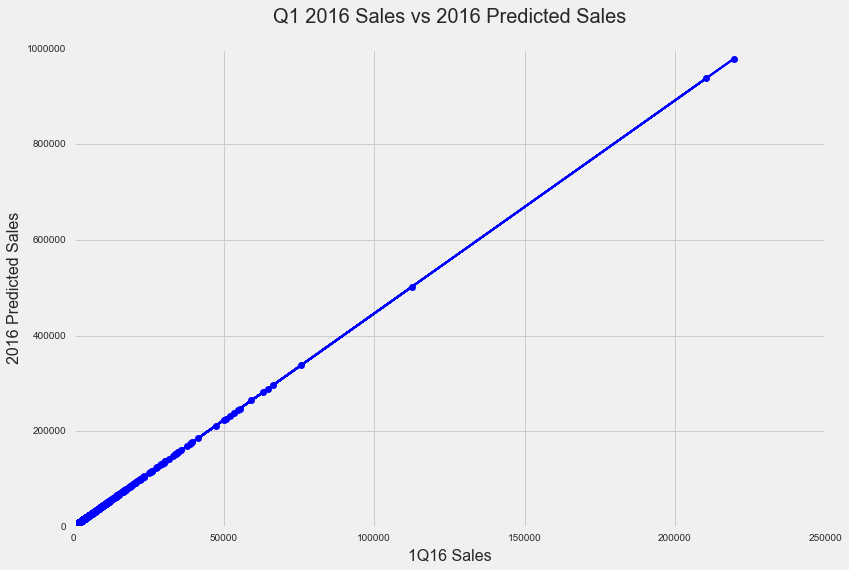

In [37]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()

plt.plot(X_new, preds_new, c='blue', linewidth=2, marker='o')

axes.set_title('Q1 2016 Sales vs 2016 Predicted Sales\n', fontsize=20)
axes.set_xlabel('1Q16 Sales', fontsize=16)
axes.set_ylabel('2016 Predicted Sales', fontsize=16)

In [18]:
#Predicted 2016 Sales by store
tb2 =pd.DataFrame(preds_new, index=tb.index, columns=['Predicted 2016 Sales'])
tb2.head()

,Predicted 2016 Sales
Store_Number,
2106,136780.594951
2113,9997.668353
2130,124895.958329
2152,6926.001857
2178,25691.248059


In [19]:
tb_new = pd.concat([tb,tb2], axis=1)
tb_new.head()

,1Q15_nSold_x_Price,1Q16_nSold_x_Price,2015_sales,Predicted 2016 Sales
Store_Number,,,,
2106,39287.29,30523.75,146326.22,136780.594951
2113,2833.25,2065.90,9310.22,9997.668353
2130,24272.57,27856.11,111871.43,124895.958329
2152,2003.46,1376.43,7721.08,6926.001857
2178,5856.41,5588.50,24324.18,25691.248059


In [20]:
# Total sales in 2016 are expected to be 3.84% higher than in 2015
(preds_new.sum() - tb['2015_sales'].sum()) /tb['2015_sales'].sum()

0.038371339228926278

In [21]:
# This is close to the increase in Q1 sales from 2015 to 2016, which is 4.00%
(tb['1Q16_nSold_x_Price'].sum()- tb['1Q15_nSold_x_Price'].sum())/tb['1Q15_nSold_x_Price'].sum()

0.03992684749249582

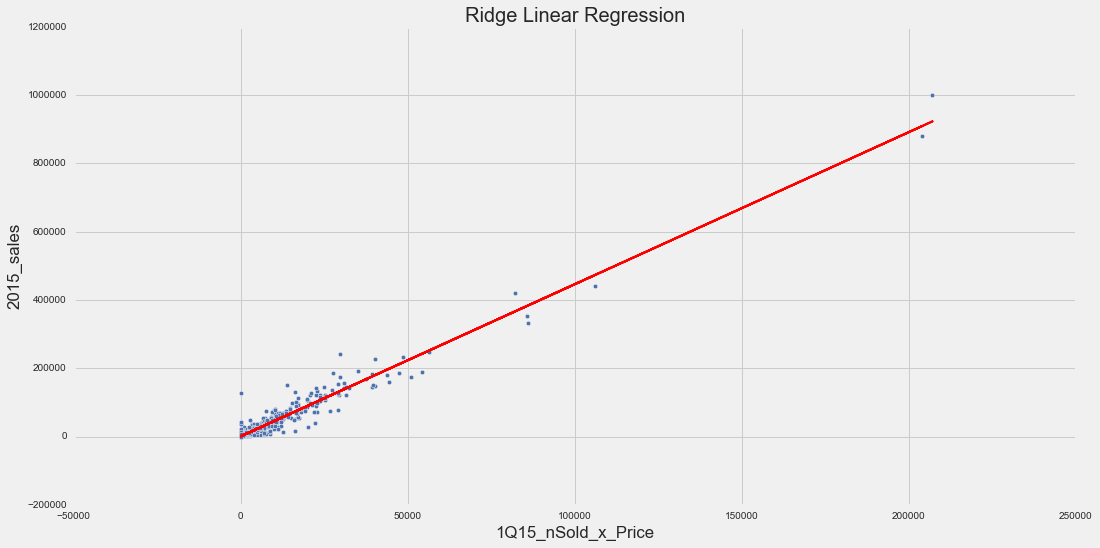

('Train R-squared:', 0.95673854420765947)
('CV-selected alpha:', 0.10000000000000001)


In [38]:

from sklearn import cross_validation, linear_model

rlmcv = linear_model.RidgeCV()

ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)

#scatter plot
tb.plot(kind='scatter', x='1Q15_nSold_x_Price', y='2015_sales',figsize=(16, 8))
# plot the least squares line with Ridge
plt.plot(X, predictions, c='red', linewidth=2)

plt.title("Ridge Linear Regression",fontsize=20)
plt.show()
print("Train R-squared:", ridge_model.score(X, y))
print("CV-selected alpha:", rlmcv.alpha_)

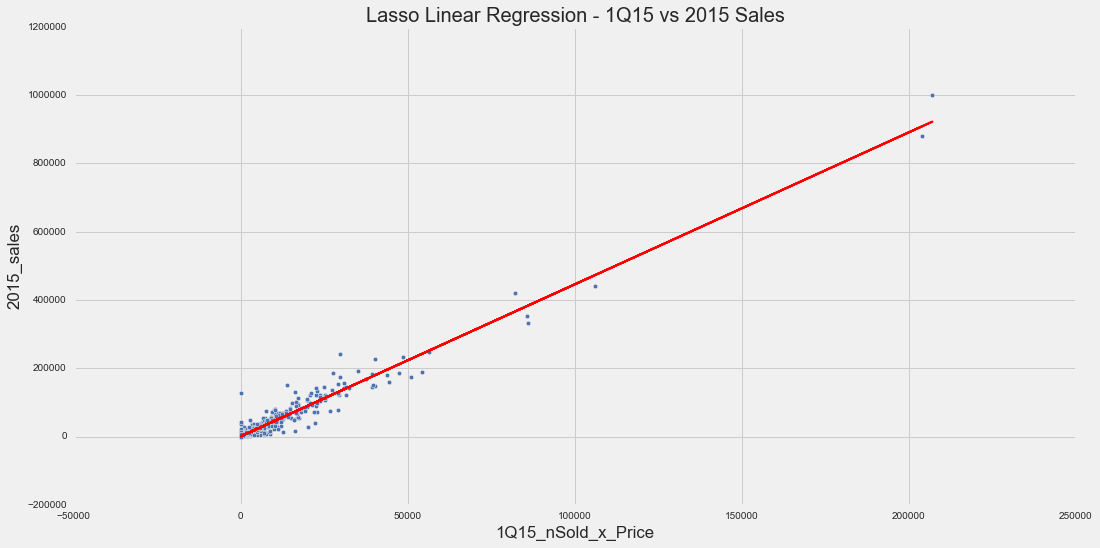

('Train R-squared:', 0.95673766341395028)
('CV-selected alpha:', 547558.57825551892)


In [45]:
llmcv = linear_model.LassoCV()

lasso_model = llmcv.fit(X, y)
predictions = lasso_model.predict(X)

#scatter plot
tb.plot(kind='scatter', x='1Q15_nSold_x_Price', y='2015_sales',figsize=(16, 8))
# plot the least squares line with Ridge
plt.plot(X, predictions, c='red', linewidth=2)

plt.title("Lasso Linear Regression - 1Q15 vs 2015 Sales",fontsize=20)
plt.show()
print("Train R-squared:", lasso_model.score(X, y))
print("CV-selected alpha:", llmcv.alpha_)

In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict


#10-fold cross validation is done on each of the 3 approaches to linear regression
#the R^2 is calculated on the held-out portion for each fold, and the mean is determined
#the results look almost identical in the 3 approaches as only one independent variable was used.
#we can see that the mean R^2 value is less than the R^2 on the whole training set.  We expect some overfitting, 
#so we expect the the mean R^2 to be lower than the R^2 on the whole dataset.
cross_val_score(lm, X, y, cv=10)

array([ 0.95813754,  0.91986237,  0.95314322,  0.72394133,  0.92547479,
        0.85669368,  0.65545307,  0.99570425,  0.84190944,  0.4507196 ])

In [25]:
cross_val_score(lm, X, y, cv=10).mean()

0.82810392577897518

In [26]:
cross_val_score(rlmcv, X, y, cv=10).mean()

0.82813126705757489

In [27]:
cross_val_score(llmcv, X, y, cv=10).mean()

0.82799572798051968

- The R^2 for the ordinary least square, Ridge least square, and Lasso least square are all about the same, as there is only one coeficient in the model.
- Ridge/Lasso regression are with built-in cross-validation.
- It performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.
- The alpha is determined by iteratively going through the cross-validation process and looking at the average error of the sub-models in each iteration.


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

- Linear regression has been performed on the Iowa state liquor store data (reduced).
- 2015 data, along with first quarter 2106 data, was used to estimate the 2016 total sales by store.
- Only one independent variable was needed to get good results.
- The independent variable used is the sum of bottles sold times price per bottle for each store during 1Q15
- The dependent variable is the sales per store during the whole year 2015
- The resulting model was used to estimate the 2016 sales by store, using the 1Q16 data provided in the dataset.
- The results look good.   The R^2 is high and the scatter plot of residuals look randomly centered at zero.
- 3 approaches were used, and all approaches yielded very similar results.
- The 3 approaches were ordinary least squares regression, Ridge regression, and Lasso regression.
- The R^2 of all 3 approached was 0.957 without cross-validation and the mean R^2 with 10-fold cross validation on the held out portion was 0.828
- We expect some overfitting, so we expect the the mean R^2 to be lower than the R^2 on the whole dataset.
- Total sales in 2016 are expected to be 3.84% higher than it was in 2015

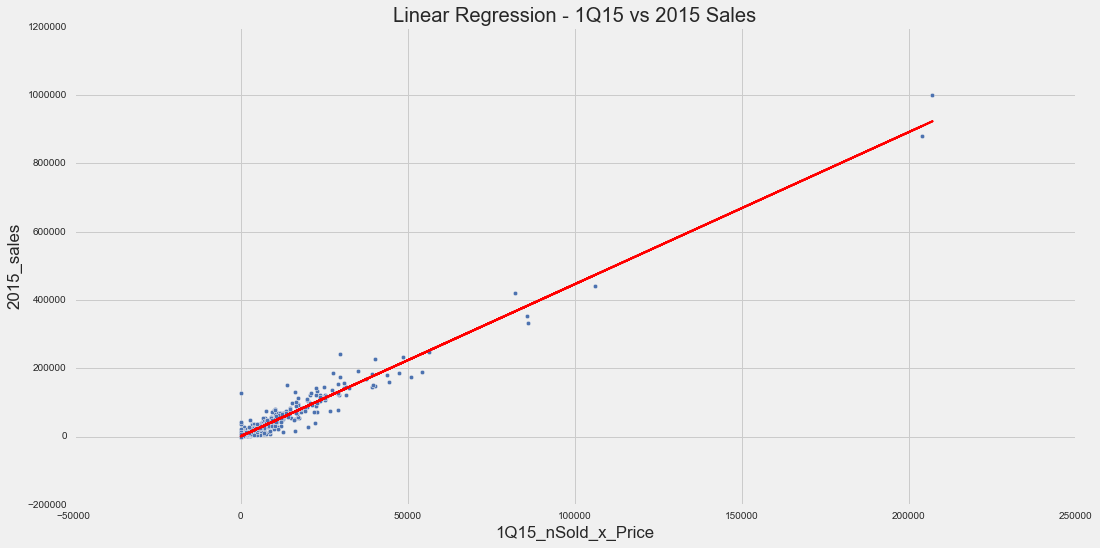

('Train R-squared:', 0.9567386201525705)


In [46]:
#scatter plot
tb.plot(kind='scatter', x='1Q15_nSold_x_Price', y='2015_sales',figsize=(16, 8))
# plot the least squares line
plt.plot(X, preds, c='red', linewidth=2)
plt.title("Linear Regression - 1Q15 vs 2015 Sales")
plt.show()
print("Train R-squared:", lm.score(X, y))

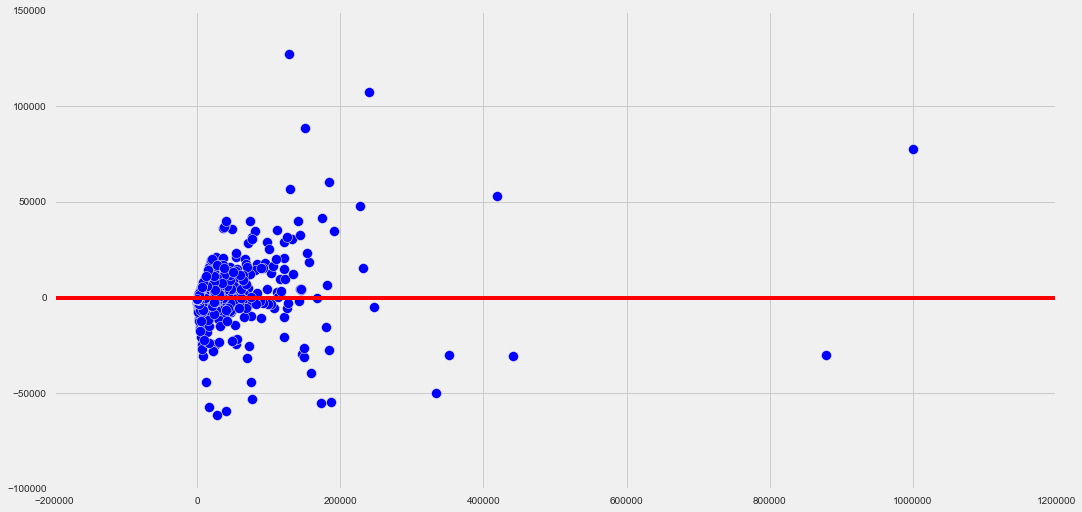

In [47]:
# Look directly at the residuals.  It looks centered at zero.
plt.figure(figsize=(16,8))
plt.scatter(y, y - preds, c = 'b', s=100, marker = 'o') 
plt.axhline(0, color='r')